In [140]:
from bs4 import BeautifulSoup
import requests
import re
import datetime
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [141]:


URL = input()

entries = []

USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36 OPR/77.0.4054.277"

https://eksisozluk.com/audi--54769?p=1


In [142]:
r = requests.get(URL, headers={'User-Agent': USER_AGENT})
soup = BeautifulSoup(r.content, 'html.parser')

In [143]:
def page_counts(url):
    """
        Get page counts of the titles
    """
    r = requests.get(url, headers={'User-Agent':USER_AGENT})
    soup = BeautifulSoup(r.content, 'html.parser')
    try:
        last_page = soup.find('div', {'class':'pager'})['data-pagecount']
    except TypeError:
        last_page = 1
    return int(last_page)

In [144]:
page_count = page_counts(URL)

In [145]:
start = datetime.datetime.now()
rootURL = URL[:-1]
for i in range(int(page_count) + 1):   ##pagecount
    
    URL_ = rootURL + str(i)
    r = requests.get(URL_, headers={'User-Agent': USER_AGENT})
    soup2 = BeautifulSoup(r.text, 'html.parser')
    entry = soup2.find('div', {'class':'content'}) # find entry content
    entry_date = soup2.find('a', {'class':'entry-date permalink'}) # find date of the entry
    while entry is not None: # iterate until entry object not None 
        data = {
            'Entry': entry.get_text(separator=" ").replace('\n','').replace('\r', '').replace('\t', '').replace('    ', '').replace('bkz: ', '').replace('---  spoiler  ---', ''),# clear the contents of the entry from unnecessary things
            'Date': entry_date.text[:10],
        }
        entries.append(data)
        entry = entry.find_next('div', {'class':'content'}) # find next entry content
        entry_date = entry_date.find_next('a', {'class':'entry-date permalink'}) # find next date of the entry
        
end = datetime.datetime.now()
end-start


datetime.timedelta(seconds=15, microseconds=275470)

In [146]:
entriesdf = pd.DataFrame.from_dict(entries)

In [147]:
entriesdf

,Entry,Date
0,pahali araba lar yapan bir firma..,10.01.2000
1,( odie ),10.01.2000
2,"""2.dünya savaşı sona erdi ama almanlar tank üretmeye devam ediyorlar"" başlıklı reklamı yapan alman otomobil üreticisi.",20.05.2000
3,audı'nın bır tt bır de a-8 modelıne hastayımdır.. a-8 ozel sıparıs uzerıne yapılan bır modelıdır. bu arada ılgınc bır olayda tt'lerın bır cogunun plakasıda tt olarak alınmıstır;heralde tesadıf degıldır bu..,20.05.2000
4,"a3, a4, a6, a8, s3 (a3 bazlı spor versiyon), s4 (a4 bazlı spor versiyon), rs4 (a4 bazlı en güçlü versiyon), tt modelleri olan lüks oto markası",29.06.2001
...,...,...
459,bugün berlin'de kamuflajlı bi suv modelini test edilirken gördüğüm marka. tam hangi modeldi çıkaramadım ama boyut olarak q5'e benziyordu.,17.11.2022
460,gerizekalılar televizyonlara yeni elektrikli modelleri için reklam vermiş. bu şirketlerin türkiye'de reklam harcamaları kadar mantıksız bir şey yok. sadece medya şirketlerine (tabi onlarda akraba ya da yakın arkadaş) para kazandırmaya yarıyor. kaç kişi günümüzde audi reklamı görüp elektrikli bir araba ya da audi alabilecek bunun dandiği volkswagen bile satış yapamıyor. adam bu ülkede 150bin euro arabaya harcayacaksa reklam sıfır etkilidir.,20.11.2022
461,ekşide reklamlarda denk geldi de ne arabalad geliyor elektirikli be..quatro felan hayırdır audicim..alınır valla,01.12.2022
462,"bugun beni $4500lik masraftan ( steering rack ) kurtaran marka, yeni yil hediyesi oldu resmen, serefine kullanici resmimizi degistirdik. artik bu markanin sempatizaniyim. hastasiyik .",22.12.2022


In [32]:
entriesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entry   464 non-null    object
 1   Date    464 non-null    object
dtypes: object(2)
memory usage: 7.4+ KB


In [33]:
df = entriesdf.copy()

In [34]:
df

,Entry,Date
0,pahali araba lar yapan bir firma..,10.01.2000
1,( odie ),10.01.2000
2,"""2.dünya savaşı sona erdi ama almanlar tank ür...",20.05.2000
3,audı'nın bır tt bır de a-8 modelıne hastayımdı...,20.05.2000
4,"a3, a4, a6, a8, s3 (a3 bazlı spor versiyon), s...",29.06.2001
...,...,...
459,bugün berlin'de kamuflajlı bi suv modelini tes...,17.11.2022
460,gerizekalılar televizyonlara yeni elektrikli m...,20.11.2022
461,ekşide reklamlarda denk geldi de ne arabalad g...,01.12.2022
462,bugun beni $4500lik masraftan ( steering rack ...,22.12.2022


In [35]:
df['Date'] = pd.to_datetime(df['Date'],format="%d.%m.%Y")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Entry   464 non-null    object        
 1   Date    464 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 7.4+ KB


In [37]:
df_grouped = df.groupby('Date')

In [38]:
df_grouped

In [39]:
entriesdf['Date']

0      10.01.2000
1      10.01.2000
2      20.05.2000
3      20.05.2000
4      29.06.2001
          ...    
459    17.11.2022
460    20.11.2022
461    01.12.2022
462    22.12.2022
463    25.12.2022
Name: Date, Length: 464, dtype: object

In [40]:
entriesdf['Date'].value_counts()[:10]

08.01.2017    19
20.01.2017    17
21.01.2017    10
26.08.2022     9
03.08.2018     7
07.02.2010     6
05.10.2013     5
09.01.2017     4
10.11.2012     4
10.02.2015     4
Name: Date, dtype: int64

In [41]:
def plotBar(degisken, n=10):
    """
        Girdi: Değişken/sütun ismi
        n = Gösterilecek en çok rastlanan eşsiz değer sayisi
        Çıktı: Çubuk grafiği
    """
    veri_ = entriesdf[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "blue")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation =45) 
    plt.ylabel("Frekans")
    plt.title(f"Veri sıklığı - {degisken}")
    plt.show()
    print(f"{degisken}:\n{veri_sayma}")

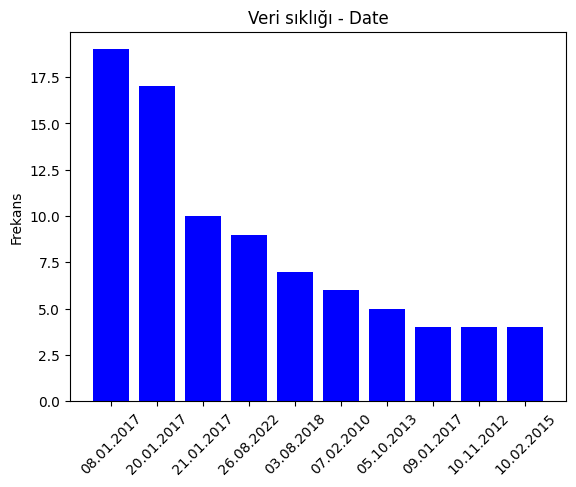

Date:
08.01.2017    19
20.01.2017    17
21.01.2017    10
26.08.2022     9
03.08.2018     7
07.02.2010     6
05.10.2013     5
09.01.2017     4
10.11.2012     4
10.02.2015     4
Name: Date, dtype: int64


In [42]:
plotBar('Date', 10)

In [43]:
date_data = entriesdf.groupby(["Date"], as_index = False).count().sort_values(by=['Entry'],ascending=False)

In [44]:
date_data.Date = pd.to_datetime(date_data.Date)

C:\Users\utku.dogan\AppData\Local\Temp\ipykernel_20828\687699979.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_data.Date = pd.to_datetime(date_data.Date)


In [45]:
date_data.Date

61    2017-08-01
200   2017-01-20
211   2017-01-21
273   2022-08-26
22    2018-03-08
         ...    
126   2008-07-13
125   2017-06-13
123   2015-05-13
122   2012-04-13
330   2019-10-31
Name: Date, Length: 331, dtype: datetime64[ns]

In [46]:
date_data.set_index('Date', inplace=True)

In [47]:
date_data

,Entry
Date,
2017-08-01,19
2017-01-20,17
2017-01-21,10
2022-08-26,9
2018-03-08,7
...,...
2008-07-13,1
2017-06-13,1
2015-05-13,1


In [49]:
import seaborn as sns

<AxesSubplot: xlabel='Date'>

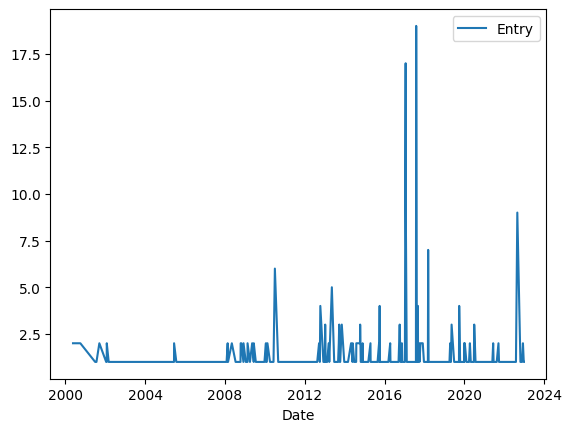

In [50]:
sns.lineplot(data = date_data)

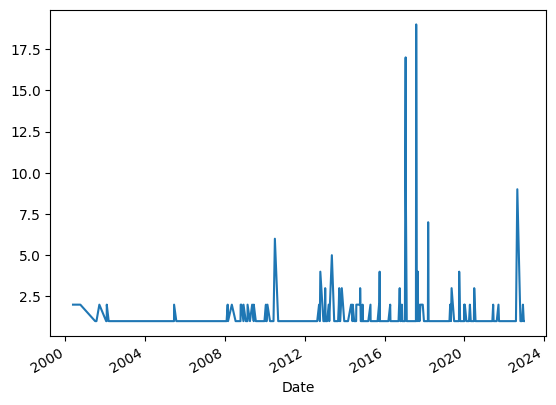

In [52]:
ax = date_data['Entry'].plot()

ticklabels = date_data.index.strftime('%Y-%m-%d')

plt.show()

In [53]:
dataset = pd.read_csv("sentiment_data.csv")


In [54]:
df = dataset.copy()
df.head()


,Unnamed: 0,Rating,Review
0,0,1.0,3 yıldır tık demedi. :)
1,1,1.0,3 yıldır kullanıyorum müthiş
2,2,1.0,Ürün bugün elime geçti çok fazla inceleme fırs...
3,3,1.0,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,4,1.0,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [55]:
df = df.drop(['Unnamed: 0'], axis=1)

In [56]:
df = df.dropna()

In [57]:
df

,Rating,Review
0,1.0,3 yıldır tık demedi. :)
1,1.0,3 yıldır kullanıyorum müthiş
2,1.0,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1.0,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1.0,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
281937,0.0,turkcell'den 2000 yılında new york borsasında ...
281938,0.0,Yeni telefon sapığım Turkcell .Açmadığım halde...
281939,0.0,106 lira fatura mı olur turkcell sadece soruyorum
281940,0.0,@Buragl111 turkcell kazık takıl sen bimcell le...


In [58]:
df['Rating'] = df['Rating'].astype('int64')

In [59]:
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
281937,0,turkcell'den 2000 yılında new york borsasında ...
281938,0,Yeni telefon sapığım Turkcell .Açmadığım halde...
281939,0,106 lira fatura mı olur turkcell sadece soruyorum
281940,0,@Buragl111 turkcell kazık takıl sen bimcell le...


In [60]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,  Dropout
from keras.preprocessing.text import Tokenizer
##from keras.preprocessing.sequence import pad_sequences

In [61]:
df['Rating'].unique().tolist()


[1, 0]

In [62]:
target = df['Rating'].values.tolist()#negatif=0, pozitif=1
data = df['Review'].values.tolist()#text verisi


In [63]:
data

['3 yıldır tık demedi. :)',
 '3 yıldır kullanıyorum müthiş ',
 'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
 'Almaya karar verdim. Hemencecik geldi. Keyifle kullanıyorum',
 'Günlük kullanımınızı çok çok iyi karsılıyor kısaca mükemmel',
 'gayet güzel',
 'Çok kaliteli bir ürün ve fiyatı da uygun. Uzun araştırmalarım sonucu aldım ve çok memnunum.',
 'yaklaşık 5 senedir kullanıyorum. defalarca düşmesine rağmen banamısın demedi. 5 yıl daha gider diye düşünüyorum.',
 'Ürün günlük kullanım için çok uygun. Ürünle birlikte 1 adet pi

In [64]:
y_test.unique().tolist()

NameError: name 'y_test' is not defined

In [65]:
seperation = int(len(data) * 0.80)
x_train, x_test = data[:seperation], data[seperation:]
y_train, y_test = target[:seperation], target[seperation:]

In [66]:
df.shape

(281459, 2)

In [67]:
num_words = 10000

In [68]:
tokenizer = Tokenizer(num_words=num_words)


In [69]:
type(data[1])

str

In [70]:
data

['3 yıldır tık demedi. :)',
 '3 yıldır kullanıyorum müthiş ',
 'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
 'Almaya karar verdim. Hemencecik geldi. Keyifle kullanıyorum',
 'Günlük kullanımınızı çok çok iyi karsılıyor kısaca mükemmel',
 'gayet güzel',
 'Çok kaliteli bir ürün ve fiyatı da uygun. Uzun araştırmalarım sonucu aldım ve çok memnunum.',
 'yaklaşık 5 senedir kullanıyorum. defalarca düşmesine rağmen banamısın demedi. 5 yıl daha gider diye düşünüyorum.',
 'Ürün günlük kullanım için çok uygun. Ürünle birlikte 1 adet pi

In [71]:
tokenizer.fit_on_texts(data)

In [72]:
import pickle

with open('turkish_tokenizer_hack.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [73]:
with open('turkish_tokenizer_hack.pickle', 'rb') as handle:
    turkish_tokenizer = pickle.load(handle)

In [74]:
x_train_tokens = turkish_tokenizer.texts_to_sequences(x_train)

In [75]:
x_train[100]


'Bu fiyata bu kalite kaçırmayın derim '

In [76]:

x_train_tokens[100]

[5, 44, 5, 143, 349, 148]

In [77]:
x_test_tokens = turkish_tokenizer.texts_to_sequences(x_test)

In [78]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)
num_tokens.shape

(281459,)

In [79]:
max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens) 
max_tokens = int(max_tokens)
max_tokens

62

In [80]:
import tensorflow as tf

In [81]:
tf.keras.utils.pad_sequences

<function keras.utils.data_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

In [82]:
x_train_pad = tf.keras.utils.pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = tf.keras.utils.pad_sequences(x_test_tokens, maxlen=max_tokens)

In [83]:
print(x_train_pad.shape)
print(x_test_pad.shape)

(225167, 62)
(56292, 62)


In [84]:
model = Sequential()

In [85]:
embedding_size = 50 

In [86]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))


In [87]:
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=4, return_sequences=False))
model.add(Dropout(0.2))
# Dense layer: Tek nörondan oluşuyor
model.add(Dense(1, activation='sigmoid'))

In [88]:
from keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [89]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])


In [90]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 62, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 62, 16)            4288      
                                                                 
 dropout (Dropout)           (None, 62, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 62, 8)             800       
                                                                 
 dropout_1 (Dropout)         (None, 62, 8)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4)                 208       
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0

In [91]:
type(y_train)
x = np.array(y_train)
print(np.unique(x))

[0 1]


In [92]:
x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)

In [93]:
model.fit(x_train_pad, y_train, epochs=10, batch_size=256)

Epoch 1/10
880/880 [==============================] - 74s 79ms/step - loss: 0.2053 - accuracy: 0.9475
Epoch 2/10
880/880 [==============================] - 64s 73ms/step - loss: 0.1079 - accuracy: 0.9657
Epoch 3/10
880/880 [==============================] - 64s 73ms/step - loss: 0.0818 - accuracy: 0.9743
Epoch 4/10
880/880 [==============================] - 65s 74ms/step - loss: 0.0663 - accuracy: 0.9799
Epoch 5/10
880/880 [==============================] - 64s 73ms/step - loss: 0.0552 - accuracy: 0.9840
Epoch 6/10
880/880 [==============================] - 65s 73ms/step - loss: 0.0460 - accuracy: 0.9873
Epoch 7/10
880/880 [==============================] - 65s 74ms/step - loss: 0.0398 - accuracy: 0.9893
Epoch 8/10
880/880 [==============================] - 66s 75ms/step - loss: 0.0351 - accuracy: 0.9909
Epoch 9/10
880/880 [==============================] - 66s 75ms/step - loss: 0.0307 - accuracy: 0.9926
Epoch 10/10
880/880 [==============================] - 69s 79ms/step - loss: 0.028

In [94]:
from keras.utils.vis_utils import plot_model

In [98]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [101]:
x_test_pad = np.array(x_test_pad)
y_test = np.array(y_test)
result = model.evaluate(x_test_pad, y_test)
result

1760/1760 [==============================] - 24s 13ms/step - loss: 1.0171 - accuracy: 0.7901


[1.0170831680297852, 0.7900944948196411]

In [102]:
def predict(texts):
    tokens = turkish_tokenizer.texts_to_sequences(texts)
    tokens_pad = tf.keras.utils.pad_sequences(tokens, maxlenR)
    return model.predict(tokens_pad)

In [104]:
texts = entriesdf['Entry'].values.tolist()
texts

['pahali  araba lar yapan bir firma..  ',
 '( odie )  ',
 '"2.dünya savaşı sona erdi ama almanlar tank üretmeye devam ediyorlar" başlıklı reklamı yapan alman otomobil üreticisi.  ',
 "audı'nın bır tt bır de a-8 modelıne hastayımdır.. a-8 ozel sıparıs uzerıne yapılan bır modelıdır. bu arada ılgınc bır olayda tt'lerın bır cogunun plakasıda tt olarak alınmıstır;heralde tesadıf degıldır bu..  ",
 'a3, a4, a6, a8, s3 (a3 bazlı spor versiyon), s4 (a4 bazlı spor versiyon), rs4 (a4 bazlı en güçlü versiyon), tt modelleri olan lüks oto markası  ',
 '380 beygir üreten aile arabası görünümünde station wagon olan rs4 ü üreten firmadır.....tapılası kalitede araçlar üretir....özellikle yol tutuş ve aktif güvenlik konusunda mukayese kabul etmez  ',
 "quattro modelini yaratarak, dünya ralli şampiyonası'na dört tekerlekten çekiş devrimini getiren, walter rohrl, michele mouton, hannu mikkola gibi pilotların kullanımında 1982 ve 1983 dünya ralli markalar şampiyonu olmuş,grup b'lerin yasaklanması ile de ra

In [105]:
texts[34:35]

['güvenlik, konfor, performans ve kalite olarak üst uçlarda gezinen bir otomobil sahibi olmak ancak bunu cümle aleme reklam etmeden insanların dikkatini çekmeden yapmak isteyenlerin tercihi.  ']

In [106]:
predicts = predict(texts)

15/15 [==============================] - 1s 15ms/step


In [107]:
print(predict(texts[8:9])[0])

1/1 [==============================] - 0s 35ms/step
[0.9802811]


In [108]:
texts[8:9]

['quattro modeline ve aynı arabanın reklamına hasta olduğum alman araba üreticisi.  ']

In [109]:
from keras.models import load_model

model.save('hack_model.h5')

In [110]:
a = texts[40:42]
a

['"biz sonradan görmelerin otomobili değiliz" diye reklam yapan, lakin günümüzde yollarda boy boy çakalları türemiş marka.  ',
 'türkiye sitesini sonunda yenilemiş marka; http://www.audi.com.tr/audi/home.aspx ']

In [111]:
predict(texts)

15/15 [==============================] - 0s 15ms/step


array([[0.0164792 ],
       [0.96196455],
       [0.99963176],
       [0.99956626],
       [0.9996919 ],
       [0.99920505],
       [0.9997026 ],
       [0.96196455],
       [0.9802812 ],
       [0.75258905],
       [0.99676865],
       [0.9996912 ],
       [0.96196455],
       [0.99493617],
       [0.99673295],
       [0.96196455],
       [0.03752292],
       [0.9996764 ],
       [0.9550155 ],
       [0.99928784],
       [0.9946111 ],
       [0.99940944],
       [0.99017483],
       [0.99392134],
       [0.3172119 ],
       [0.10615575],
       [0.99948025],
       [0.9996511 ],
       [0.9634171 ],
       [0.99952555],
       [0.96196455],
       [0.9994558 ],
       [0.96196455],
       [0.99968606],
       [0.9991232 ],
       [0.99962145],
       [0.96196455],
       [0.99960077],
       [0.0639303 ],
       [0.99948555],
       [0.00441344],
       [0.9995313 ],
       [0.9996236 ],
       [0.9996282 ],
       [0.9996705 ],
       [0.99965346],
       [0.00334152],
       [0.998

In [112]:
predicts = predict(texts)

15/15 [==============================] - 0s 15ms/step


In [113]:
predicts

array([[0.0164792 ],
       [0.96196455],
       [0.99963176],
       [0.99956626],
       [0.9996919 ],
       [0.99920505],
       [0.9997026 ],
       [0.96196455],
       [0.9802812 ],
       [0.75258905],
       [0.99676865],
       [0.9996912 ],
       [0.96196455],
       [0.99493617],
       [0.99673295],
       [0.96196455],
       [0.03752292],
       [0.9996764 ],
       [0.9550155 ],
       [0.99928784],
       [0.9946111 ],
       [0.99940944],
       [0.99017483],
       [0.99392134],
       [0.3172119 ],
       [0.10615575],
       [0.99948025],
       [0.9996511 ],
       [0.9634171 ],
       [0.99952555],
       [0.96196455],
       [0.9994558 ],
       [0.96196455],
       [0.99968606],
       [0.9991232 ],
       [0.99962145],
       [0.96196455],
       [0.99960077],
       [0.0639303 ],
       [0.99948555],
       [0.00441344],
       [0.9995313 ],
       [0.9996236 ],
       [0.9996282 ],
       [0.9996705 ],
       [0.99965346],
       [0.00334152],
       [0.998

In [114]:
type(predicts)

numpy.ndarray

In [115]:
tahmin = list()

In [116]:
for i in predicts:
    if i <0.5:
        tahmin.append("negatif")
        print("negatif")
    else:
        tahmin.append("pozitif")
        print("pozitif")
        

negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
negatif
negatif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif
negatif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
pozitif
negatif
pozitif


In [117]:
a = predict(['Aşk','vasat','Berbat'])

1/1 [==============================] - 0s 36ms/step


In [118]:
tahmin

['negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'negatif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'pozitif',
 'ne

In [119]:
entriesdf['Tahmin'] = tahmin

In [120]:
entriesdf

,Entry,Date,Tahmin
0,pahali araba lar yapan bir firma..,10.01.2000,negatif
1,( odie ),10.01.2000,pozitif
2,"""2.dünya savaşı sona erdi ama almanlar tank ür...",20.05.2000,pozitif
3,audı'nın bır tt bır de a-8 modelıne hastayımdı...,20.05.2000,pozitif
4,"a3, a4, a6, a8, s3 (a3 bazlı spor versiyon), s...",29.06.2001,pozitif
...,...,...,...
459,bugün berlin'de kamuflajlı bi suv modelini tes...,17.11.2022,pozitif
460,gerizekalılar televizyonlara yeni elektrikli m...,20.11.2022,pozitif
461,ekşide reklamlarda denk geldi de ne arabalad g...,01.12.2022,pozitif
462,bugun beni $4500lik masraftan ( steering rack ...,22.12.2022,pozitif


In [121]:
pd.set_option("display.max_colwidth", -1)

C:\Users\utku.dogan\AppData\Local\Temp\ipykernel_20828\2475433900.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [122]:
entriesdf

,Entry,Date,Tahmin
0,pahali araba lar yapan bir firma..,10.01.2000,negatif
1,( odie ),10.01.2000,pozitif
2,"""2.dünya savaşı sona erdi ama almanlar tank üretmeye devam ediyorlar"" başlıklı reklamı yapan alman otomobil üreticisi.",20.05.2000,pozitif
3,audı'nın bır tt bır de a-8 modelıne hastayımdır.. a-8 ozel sıparıs uzerıne yapılan bır modelıdır. bu arada ılgınc bır olayda tt'lerın bır cogunun plakasıda tt olarak alınmıstır;heralde tesadıf degıldır bu..,20.05.2000,pozitif
4,"a3, a4, a6, a8, s3 (a3 bazlı spor versiyon), s4 (a4 bazlı spor versiyon), rs4 (a4 bazlı en güçlü versiyon), tt modelleri olan lüks oto markası",29.06.2001,pozitif
...,...,...,...
459,bugün berlin'de kamuflajlı bi suv modelini test edilirken gördüğüm marka. tam hangi modeldi çıkaramadım ama boyut olarak q5'e benziyordu.,17.11.2022,pozitif
460,gerizekalılar televizyonlara yeni elektrikli modelleri için reklam vermiş. bu şirketlerin türkiye'de reklam harcamaları kadar mantıksız bir şey yok. sadece medya şirketlerine (tabi onlarda akraba ya da yakın arkadaş) para kazandırmaya yarıyor. kaç kişi günümüzde audi reklamı görüp elektrikli bir araba ya da audi alabilecek bunun dandiği volkswagen bile satış yapamıyor. adam bu ülkede 150bin euro arabaya harcayacaksa reklam sıfır etkilidir.,20.11.2022,pozitif
461,ekşide reklamlarda denk geldi de ne arabalad geliyor elektirikli be..quatro felan hayırdır audicim..alınır valla,01.12.2022,pozitif
462,"bugun beni $4500lik masraftan ( steering rack ) kurtaran marka, yeni yil hediyesi oldu resmen, serefine kullanici resmimizi degistirdik. artik bu markanin sempatizaniyim. hastasiyik .",22.12.2022,pozitif


In [123]:
a = ['negatif']

In [124]:
entriesdf[entriesdf.Tahmin.isin(a)][34:40]

,Entry,Date,Tahmin
299,"""audi'de asla bulamayacağınız aksesuarlar"" diyerek girdikleri pazarda şu anda düştükleri durum ironik tir.",20.01.2017,negatif
317,efendi zenginlerin tercih ettiği araba markasıdır.,13.06.2017,negatif
327,"audi a3 1.0 tfsi, a4 1.4 tfsi, a5-quattro 2.0 tdi kullanma fırsatı bulmuş biri olarak söyleyebilirim ki volkswagen modellerine benzetenler için söylüyorum biri labne,nescafe ve hazır kekle yapılmış tiramisuyken diğeri mascaponi peyniri ve agave şurubu, savyar bisküviyle yapılmış halis muhlis tiramisudur. a7 ile henüz tanışma fırsatım olmadı...",18.10.2017,negatif
329,"sadelik, zerafet ve sağlamlık arayanların arabasıdır. kullanıcı portföyü merso'dan ve bmw'den çok farklıdır. bu durum farklı ülkeleri içeren bir araştırma konusu olmuş ve literatüre de audi effect olarak girmiştir. geris laf-ı güzaf.",29.11.2017,negatif
336,ben ki 4 tekerlekli ve içten yanmalı motora sahip götürgeçlerin hepsine bir şekilde sevda besleyen bir adamım ama bu kadar standart bir markanın niye bu kadar yüksek fiyatlarla araç satmaya çalıştığını anlayamıyorum. iç mekanı iyi malzeme ile yapılmış vw diyeceğim ki o da tartışılır. öyle efsane bir iç mekan da yok rakiplerine göre. sürüş dinamikleri ise aynı segmentte vw ile aynı.,03.03.2018,negatif
338,"ankara'da yaşayan kullanıcılarından şöyle sağlam, nezih, düzgün, kısacası adam gibi adam bir servis tavsiye etmelerini acilen rica ettiğim güzide marka..",16.03.2018,negatif


In [125]:
import seaborn as sns

Text(0.5, 1.0, 'olumlu - olumsuz sayısı')

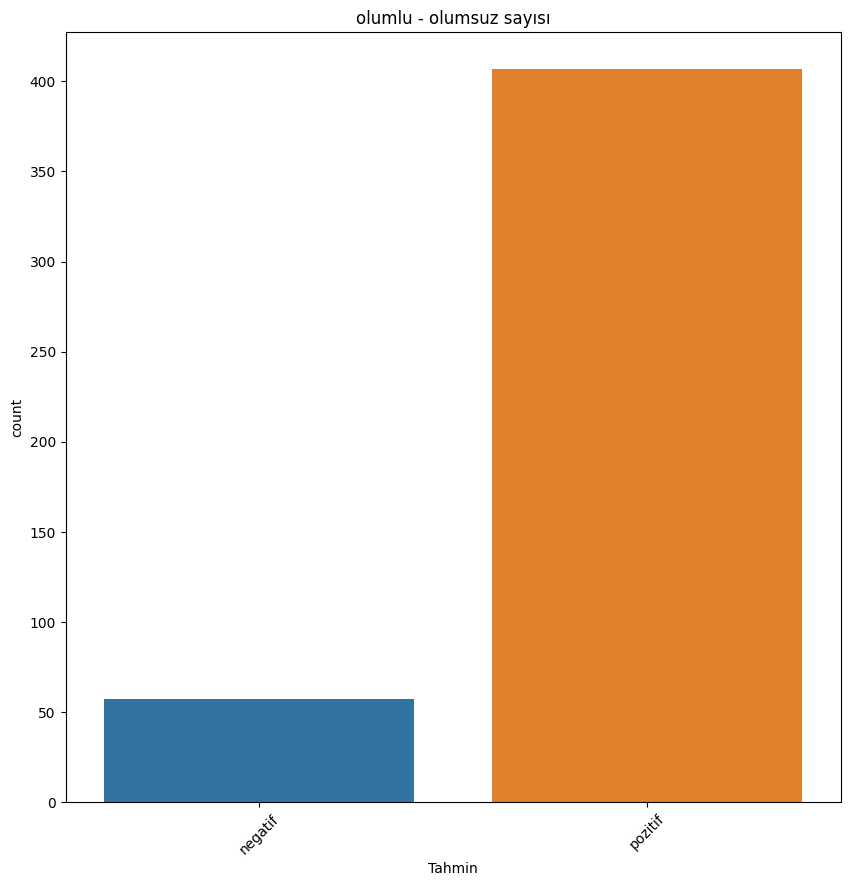

In [126]:
plt.figure(figsize=(10,10))
sns.countplot(x='Tahmin',data=entriesdf,)
plt.xticks(rotation=45)
plt.title("olumlu - olumsuz sayısı")

In [127]:
from keras.models import load_model

In [128]:
with open('turkish_tokenizer_hack.pickle', 'rb') as handle:
        turkish_tokenizer = pickle.load(handle)

In [136]:
entries = entriesdf.Entry.to_list()

In [ ]:
with open('turkish_tokenizer_hack.pickle', 'rb') as handle:
    turkish_tokenizer = pickle.load(handle)

In [139]:
tokens = turkish_tokenizer.texts_to_sequences(entries)
tokens_pad = tf.keras.utils.pad_sequences(tokens, maxlen=max_tokens)
model.predict(tokens_pad)

15/15 [==============================] - 0s 15ms/step


array([[0.0164792 ],
       [0.96196455],
       [0.99963176],
       [0.99956626],
       [0.9996919 ],
       [0.99920505],
       [0.9997026 ],
       [0.96196455],
       [0.9802812 ],
       [0.75258905],
       [0.99676865],
       [0.9996912 ],
       [0.96196455],
       [0.99493617],
       [0.99673295],
       [0.96196455],
       [0.03752292],
       [0.9996764 ],
       [0.9550155 ],
       [0.99928784],
       [0.9946111 ],
       [0.99940944],
       [0.99017483],
       [0.99392134],
       [0.3172119 ],
       [0.10615575],
       [0.99948025],
       [0.9996511 ],
       [0.9634171 ],
       [0.99952555],
       [0.96196455],
       [0.9994558 ],
       [0.96196455],
       [0.99968606],
       [0.9991232 ],
       [0.99962145],
       [0.96196455],
       [0.99960077],
       [0.0639303 ],
       [0.99948555],
       [0.00441344],
       [0.9995313 ],
       [0.9996236 ],
       [0.9996282 ],
       [0.9996705 ],
       [0.99965346],
       [0.00334152],
       [0.998